### Basic Neural Network by Pytorch ###

지난번 Linear Regression으로 풀었던 문제를 굳이 Neural Network를 이용해서 풀어볼 것이다.  
아무리 간단한 네트워크라고 하더라도 가장 큰 차이점은 Non-linear한 모델일 것이다.

In [95]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [96]:
data_len = 1000
epoch_len = 10000

In [97]:
x = init.uniform_(torch.zeros(data_len,1), -15, 15) # sampling from -15 to 15
noise = init.normal_(torch.zeros(data_len,1), std=1) # sampling from N(0,1)

여기서 우리의 목적은 작은 NN을 학습시켜 f(x)=x^2 + 3 이라는 함수를 근사하는 것이다.  
(실제 데이터에는 어느 정도 노이즈가 있을 것이기 때문에 임의로 노이즈를 첨가하였다.)  
주목해서 볼만한 점은 f(x)가 이제 2차식이기 때문에 비선형이라는 것이다.  
따라서 비선형적인 요소를 집어 넣어야 근사가 가능하다.  
따라서 ReLU()라는 Non-linear function을 사용한다.

In [98]:
y = x ** 2 + 3
y_noise =  y + noise

In [99]:
model = nn.Sequential(
    nn.Linear(1, 6),
    nn.ReLU(),
    nn.Linear(6,10),
    nn.ReLU(),
    nn.Linear(10,6),
    nn.ReLU(),
    nn.Linear(6,1)
)

지난 번 예제에서는 MSELoss()를 사용하였다. (Mean Square Error).  
이번에 사용하는 L1 loss는 에러들의 절대 값의 합을 Loss로 사용한다.

In [100]:
loss_func = nn.L1Loss()

In [101]:
optimizer = optim.SGD(model.parameters(), lr=0.0002)


In [102]:
target = y_noise
losses = []
outputs = []
for i in range(epoch_len):

    model.zero_grad()
    output = model(x)

    loss = loss_func(output, target)
    loss.backward()
    
    optimizer.step()
    
    losses.append(loss.data)
    if i % 100 == 0:
        print("Loss = ", loss.data)

    if i % 1000 == 0:
        outputs.append(output.detach().numpy())


Loss =  tensor(77.2926)
Loss =  tensor(77.1558)
Loss =  tensor(77.0160)
Loss =  tensor(76.8703)
Loss =  tensor(76.7119)
Loss =  tensor(76.5321)
Loss =  tensor(76.3211)
Loss =  tensor(76.0632)
Loss =  tensor(75.7337)
Loss =  tensor(75.2942)
Loss =  tensor(74.6808)
Loss =  tensor(73.7744)
Loss =  tensor(72.3560)
Loss =  tensor(69.9549)
Loss =  tensor(65.3928)
Loss =  tensor(55.3015)
Loss =  tensor(39.4772)
Loss =  tensor(28.6219)
Loss =  tensor(21.2619)
Loss =  tensor(19.9254)
Loss =  tensor(19.6584)
Loss =  tensor(19.4980)
Loss =  tensor(19.3516)
Loss =  tensor(19.2097)
Loss =  tensor(19.0710)
Loss =  tensor(18.9347)
Loss =  tensor(18.7978)
Loss =  tensor(18.6592)
Loss =  tensor(18.5193)
Loss =  tensor(18.3777)
Loss =  tensor(18.2342)
Loss =  tensor(18.0904)
Loss =  tensor(17.9443)
Loss =  tensor(17.7948)
Loss =  tensor(17.6417)
Loss =  tensor(17.4838)
Loss =  tensor(17.3227)
Loss =  tensor(17.1540)
Loss =  tensor(16.9819)
Loss =  tensor(16.8040)
Loss =  tensor(16.6213)
Loss =  tensor(1

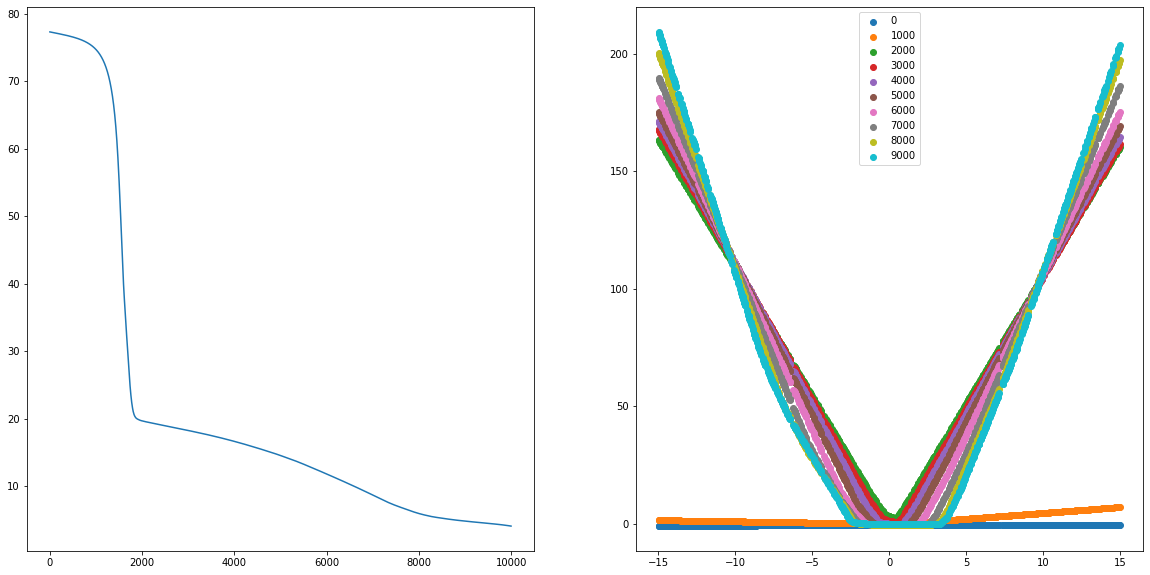

In [105]:


import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(20,10))


ax[0].plot(losses)
for idx, output in enumerate(outputs):
    ax[1].scatter(x, output)
ax[1].legend([str(i*1000) for i in range(10)])
plt.show()

# 결과 #

왼쪽 그래프는 에러가 어떻게 감소하는지 보여준다.  
오른쪽 그래프는 학습된 NN을 사용해서 중간중간 output을 그려서 f(x)=x^2+3과 얼마나 비슷해졌는지 그려보았다.  
보면 우리가 생각하는 포물선의 모양은 아니지만 얼추 비슷하게 자리잡아나가는 것을 볼 수 있다.  
부드러운 곡선이 잘 나오지 않는 이유는 NN의 Non-linear를 담당하는 부분이 ReLU라서 사실상 거의 Linear만으로 이루어졌다고 봐도 무방하기 때문이다.  